# Projektarbeit Gruppe 2: Gesundheitsdaten

Sebastian Grab, Josua Klöble, Imanuel Ricker

Konsolidierung aller benötigten Anforderungen innerhalb unseres Use Cases.

https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

In [4]:
# Import der benötigten Bibliotheken

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Datentransformation & -exploration

1. Daten laden und verstehen

In [5]:
# Lokaler Repository Pfad auslesen zum dynamischen Laden unabhängig des Nutzers:
path = str(os.getcwd()).replace("\Projektarbeit", "")

# Lesen der CSV Datei:
dataset = pd.read_csv(path + '\smoking_driking_dataset_Ver01.csv')

In [6]:
# Umbenennen der Spalten:

dataset = dataset.rename(columns={'sex': 'Geschlecht', 'age': 'Alter', 'height': 'Größe', 'weight': 'Gewicht', 'waistline': 'Hüftumfang', 'sight_left': 'Sehkraft_links', 'sight_right': 'Sehkraft_rechts', 'hear_left': 'Hörkraft_links', 'hear_right': 'Hörkraft_rechts', 'SBP': 'Systolischer Blutdruck', 'DBP': 'Diastolischer Blutdruck', 'BLDS': 'Blutleckdetektor', 'tot_chole': 'Totale Cholesterin', 'HDL_chole': 'HDL_Cholesterin', 'LDL_chole': 'LDL_Cholesterin', 'triglyceride': 'Triglycerid', 'hemoglobin': 'Hemoglobin', 'urine_protein': 'Urin_Proteine', 'serum_creatinine': 'Serum_Kreatinin', 'SGOT_AST': 'SGOT_AST', 'SGOT_ALT': 'SGOT_ALT', 'gamma_GTP': 'gamma_GTP', 'SMK_stat_type_cd': 'Raucher_Status', 'DRK_YN': 'Trinker'})

dataset.head()

,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,...,LDL_Cholesterin,Triglycerid,Hemoglobin,Urin_Proteine,Serum_Kreatinin,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


Erkentnisse:

--> Input Josua (+ Team)

2. Daten transformieren:

In [7]:
# Spalten transfomieren:

    # Trinker-Spalte: Y (für Yes) zu 1 & n (für No) zu 0

dataset["Trinker"] = dataset["Trinker"] == 'Y'
dataset["Trinker"] = dataset["Trinker"].astype(int)


    # Hörkraft-Spalten: 1 (für normal) bleibt 1 & 2 (für abnormal) zu 0

dataset["Hörkraft_links"] = dataset["Hörkraft_links"] == 1
dataset["Hörkraft_links"] = dataset["Hörkraft_links"].astype(int)

dataset["Hörkraft_rechts"] = dataset["Hörkraft_rechts"] == 1
dataset["Hörkraft_rechts"] = dataset["Hörkraft_rechts"].astype(int)


    # Hinzufügen einer berechneten Spalte - der Body-Mass-Index:

body_mass_index = dataset["Gewicht"].astype(np.float64) / ((dataset["Größe"].astype(np.float64) / 100) * (dataset["Größe"].astype(np.float64) / 100))

dataset["Body-Mass-Index"] = round(body_mass_index, 3)


    # Hinzufügen einer berechneten Spalte - der mittlere arterielle Blutdruck:

MAD = dataset["Diastolischer Blutdruck"] + (( dataset["Systolischer Blutdruck"] - dataset["Diastolischer Blutdruck"] ) * 0.5)

dataset["Mittlerer arterieller Blutdruck"] = MAD


dataset.head()

,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,...,Hemoglobin,Urin_Proteine,Serum_Kreatinin,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker,Body-Mass-Index,Mittlerer arterieller Blutdruck
0,Male,35,170,75,90.0,1.0,1.0,1,1,120.0,...,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1,25.952,100.0
1,Male,30,180,80,89.0,0.9,1.2,1,1,130.0,...,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0,24.691,106.0
2,Male,40,165,75,91.0,1.2,1.5,1,1,120.0,...,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0,27.548,95.0
3,Male,50,175,80,91.0,1.5,1.2,1,1,145.0,...,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0,26.122,116.0
4,Male,50,165,60,80.0,1.0,1.2,1,1,138.0,...,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0,22.039,110.0


Zusammenfassung:

--> Input Team

3. Datenexploration:

In [8]:
# Datenexploration zur Erkennung von Bereinigungsbedarf:

# Funktion zum Darstellen der Verteilung der Werte einer Spalte:

def bar_chart(column):
    share = (dataset[column].sort_values().value_counts(sort=False) / len(dataset)) * 100 
    plt.figure(figsize=(10, 6)) 
    share.plot(kind='bar') 
    plt.xlabel(share) 
    plt.ylabel('Prozentuale Häufigkeit')
    plt.grid(axis='y') 
    plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

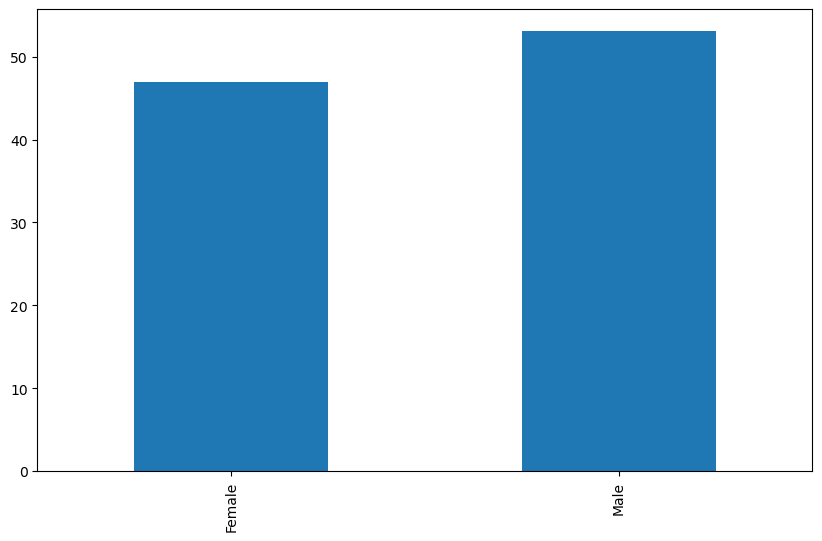

In [11]:
column_names = dataset.columns.values.tolist()

for column in column_names:
    bar_chart(column)

Auffällige Datenpunkte:

1. Hüftumfang: Wenige Datenpunkte bei 999 cm
2. Sehkraft_links: Wenige Datenpunkte bei 9.9 (Verteilung der anderen Werte von 0,1 bis 2,0)
3. Sehkraft_rechts: Wenige Datenpunkte bei 9.9 (Verteilung der anderen Werte von 0,1 bis 2,0)

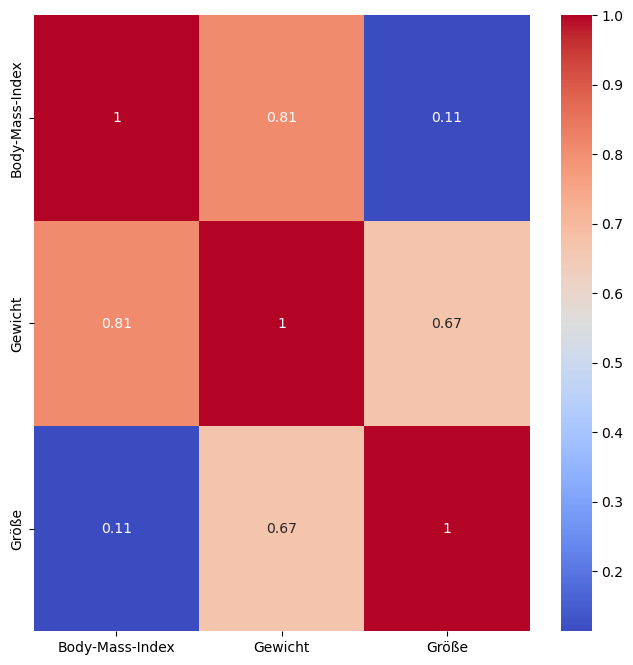

In [12]:
# Korrelation:

def corr(columns):
    plt.figure(figsize=(8, 8))
    data = dataset[columns]
    heatmap = sns.heatmap(data.corr(), annot=True, cmap="coolwarm")


corr(['Body-Mass-Index','Gewicht','Größe'])

# Datenbereinigung

In [13]:
# Es gibt 57 Reihen, in denen ein Hüftumfang von 9,99 m angegeben wurde:

filtered_dataset = dataset[dataset['Hüftumfang'] == 999]
len(filtered_dataset.index)

    # Eliminierung der fehlerhaften Reihen:

dataset = dataset[dataset['Hüftumfang'] != 999]



# Es gibt mehrer Reihen, in denen die Sehkraft 9,9 angegeben wurde. Dies bedeutet, dass der Proband erblindet ist.

filtered_dataset = dataset[dataset['Sehkraft_rechts'] == 9.9]
len(filtered_dataset.index)

filtered_dataset = dataset[dataset['Sehkraft_links'] == 9.9]
len(filtered_dataset.index)


dataset.describe()

,Alter,Größe,Gewicht,Hüftumfang,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,Diastolischer Blutdruck,...,Hemoglobin,Urin_Proteine,Serum_Kreatinin,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker,Body-Mass-Index,Mittlerer arterieller Blutdruck
count,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,...,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000,991289.000000
mean,47.615514,162.240749,63.284163,81.180585,0.980829,0.978426,0.968504,0.969523,122.433380,76.053192,...,14.229941,1.094217,0.860482,25.989829,25.755781,37.137808,1.608154,0.499841,23.917076,99.243286
std,14.181079,9.283135,12.514436,9.591801,0.605961,0.604787,0.174655,0.171897,14.542938,9.889186,...,1.584876,0.437714,0.480538,23.493927,26.309116,50.425216,0.818517,0.500000,3.515113,11.428742
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,0.000000,0.000000,67.000000,32.000000,...,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000,12.487000,49.500000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,0.000000,21.484000,91.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000,0.000000,23.875000,99.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000,1.000000,25.952000,106.000000
max,85.000000,190.000000,140.000000,149.100000,9.900000,9.900000,1.000000,1.000000,273.000000,185.000000,...,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000,1.000000,45.714000,212.500000


Feature Engineering

Problem - Bedingungen um Blutdruck einzuteilen können nicht immer erfüllt werden. (Bspw. Sys. BD. normal; Dias. BD optimal. Daher keine Einordung)
Lösungen:
    1. Tolernazen einbauen
    2. Nach mittleren BD gehen
    3. Nur Obergrenzen festlegen
    4. Sys. und Dias. BD eigenständig Einordungen. Anschließend beide Einordungen "vergleichen" und Mittlere Einordung nehemen. Evtl mit Hang zum schlechteren 

Lösung 2:

BD_optimal --> <=119 / <=79 --> <100
BD_normal --> 120 - 129 / 80 - 84 --> >=100 - <106,5
BD_Grenzwert_normal --> 130 - 139 / 85 - 89 --> >=106,5 - <111,5
BD_Hypertonie Grad 1  --> 140 - 159 / 90 - 99 --> >=111,5 - <129
BD_Hypertonie Grad 2  --> 160 - 179 / 100 - 109 --> >=129 - <144
BD_Hypertonie Grad 3  --> >179 / >109 --> >=111,5 - >=144


In [ ]:
dataset["BD_optimal"] = dataset['Systolischer Blutdruck']
dataset["BD_normal"] = dataset['Systolischer Blutdruck']
dataset["BD_Grenzwert_normal"] = dataset['Systolischer Blutdruck']
dataset["BD_Hypertonie Grad 1"] = dataset['Systolischer Blutdruck']
dataset["BD_Hypertonie Grad 2"] = dataset['Systolischer Blutdruck']
dataset["BD_Hypertonie Grad 3"] = dataset['Systolischer Blutdruck']

In [ ]:
dataset["BD_optimal"] = (dataset['Mittlerer arterieller Blutdruck'] <100)
dataset["BD_optimal"] = dataset["BD_optimal"].astype(int)

dataset["BD_normal"] = (dataset['Mittlerer arterieller Blutdruck'] >= 100) & (dataset['Mittlerer arterieller Blutdruck'] < 106.5)
dataset["BD_normal"] = dataset["BD_normal"].astype(int) 

dataset["BD_Grenzwert_normal"] = (dataset['Mittlerer arterieller Blutdruck'] >= 106.5) & (dataset['Mittlerer arterieller Blutdruck'] < 111.5)
dataset["BD_Grenzwert_normal"] = dataset["BD_Grenzwert_normal"].astype(int) 

dataset["BD_Hypertonie Grad 1"] = (dataset['Mittlerer arterieller Blutdruck'] >= 111.5) & (dataset['Mittlerer arterieller Blutdruck'] < 129)
dataset["BD_Hypertonie Grad 1"] = dataset["BD_Hypertonie Grad 1"].astype(int) 

dataset["BD_Hypertonie Grad 2"] = (dataset['Mittlerer arterieller Blutdruck'] >= 129) & (dataset['Mittlerer arterieller Blutdruck'] < 144)
dataset["BD_Hypertonie Grad 2"] = dataset["BD_Hypertonie Grad 2"].astype(int) 

dataset["BD_Hypertonie Grad 3"] = (dataset['Mittlerer arterieller Blutdruck'] >=144)
dataset["BD_Hypertonie Grad 3"] = dataset["BD_Hypertonie Grad 3"].astype(int) 

In [31]:
dummy = pd.get_dummies(dataset['Raucher_Status'], prefix='', prefix_sep='Raucher_')

# Verbinde Dummy-Variablen mit dem ursprünglichen DataFrame
dataset = pd.concat([dataset, dummy], axis=1)

# Entferne die ursprüngliche Spalte "Raucher_Status", wenn gewünscht
# dataset = dataset.drop('Raucher_Status', axis=1)

# Umbenennen der Dummy-Spalten
dataset = dataset.rename(columns={'Raucher_1.0': 'Raucher_nie', 'Raucher_2.0': 'Raucher_ehem', 'Raucher_3.0': 'Raucher_aktiv'})


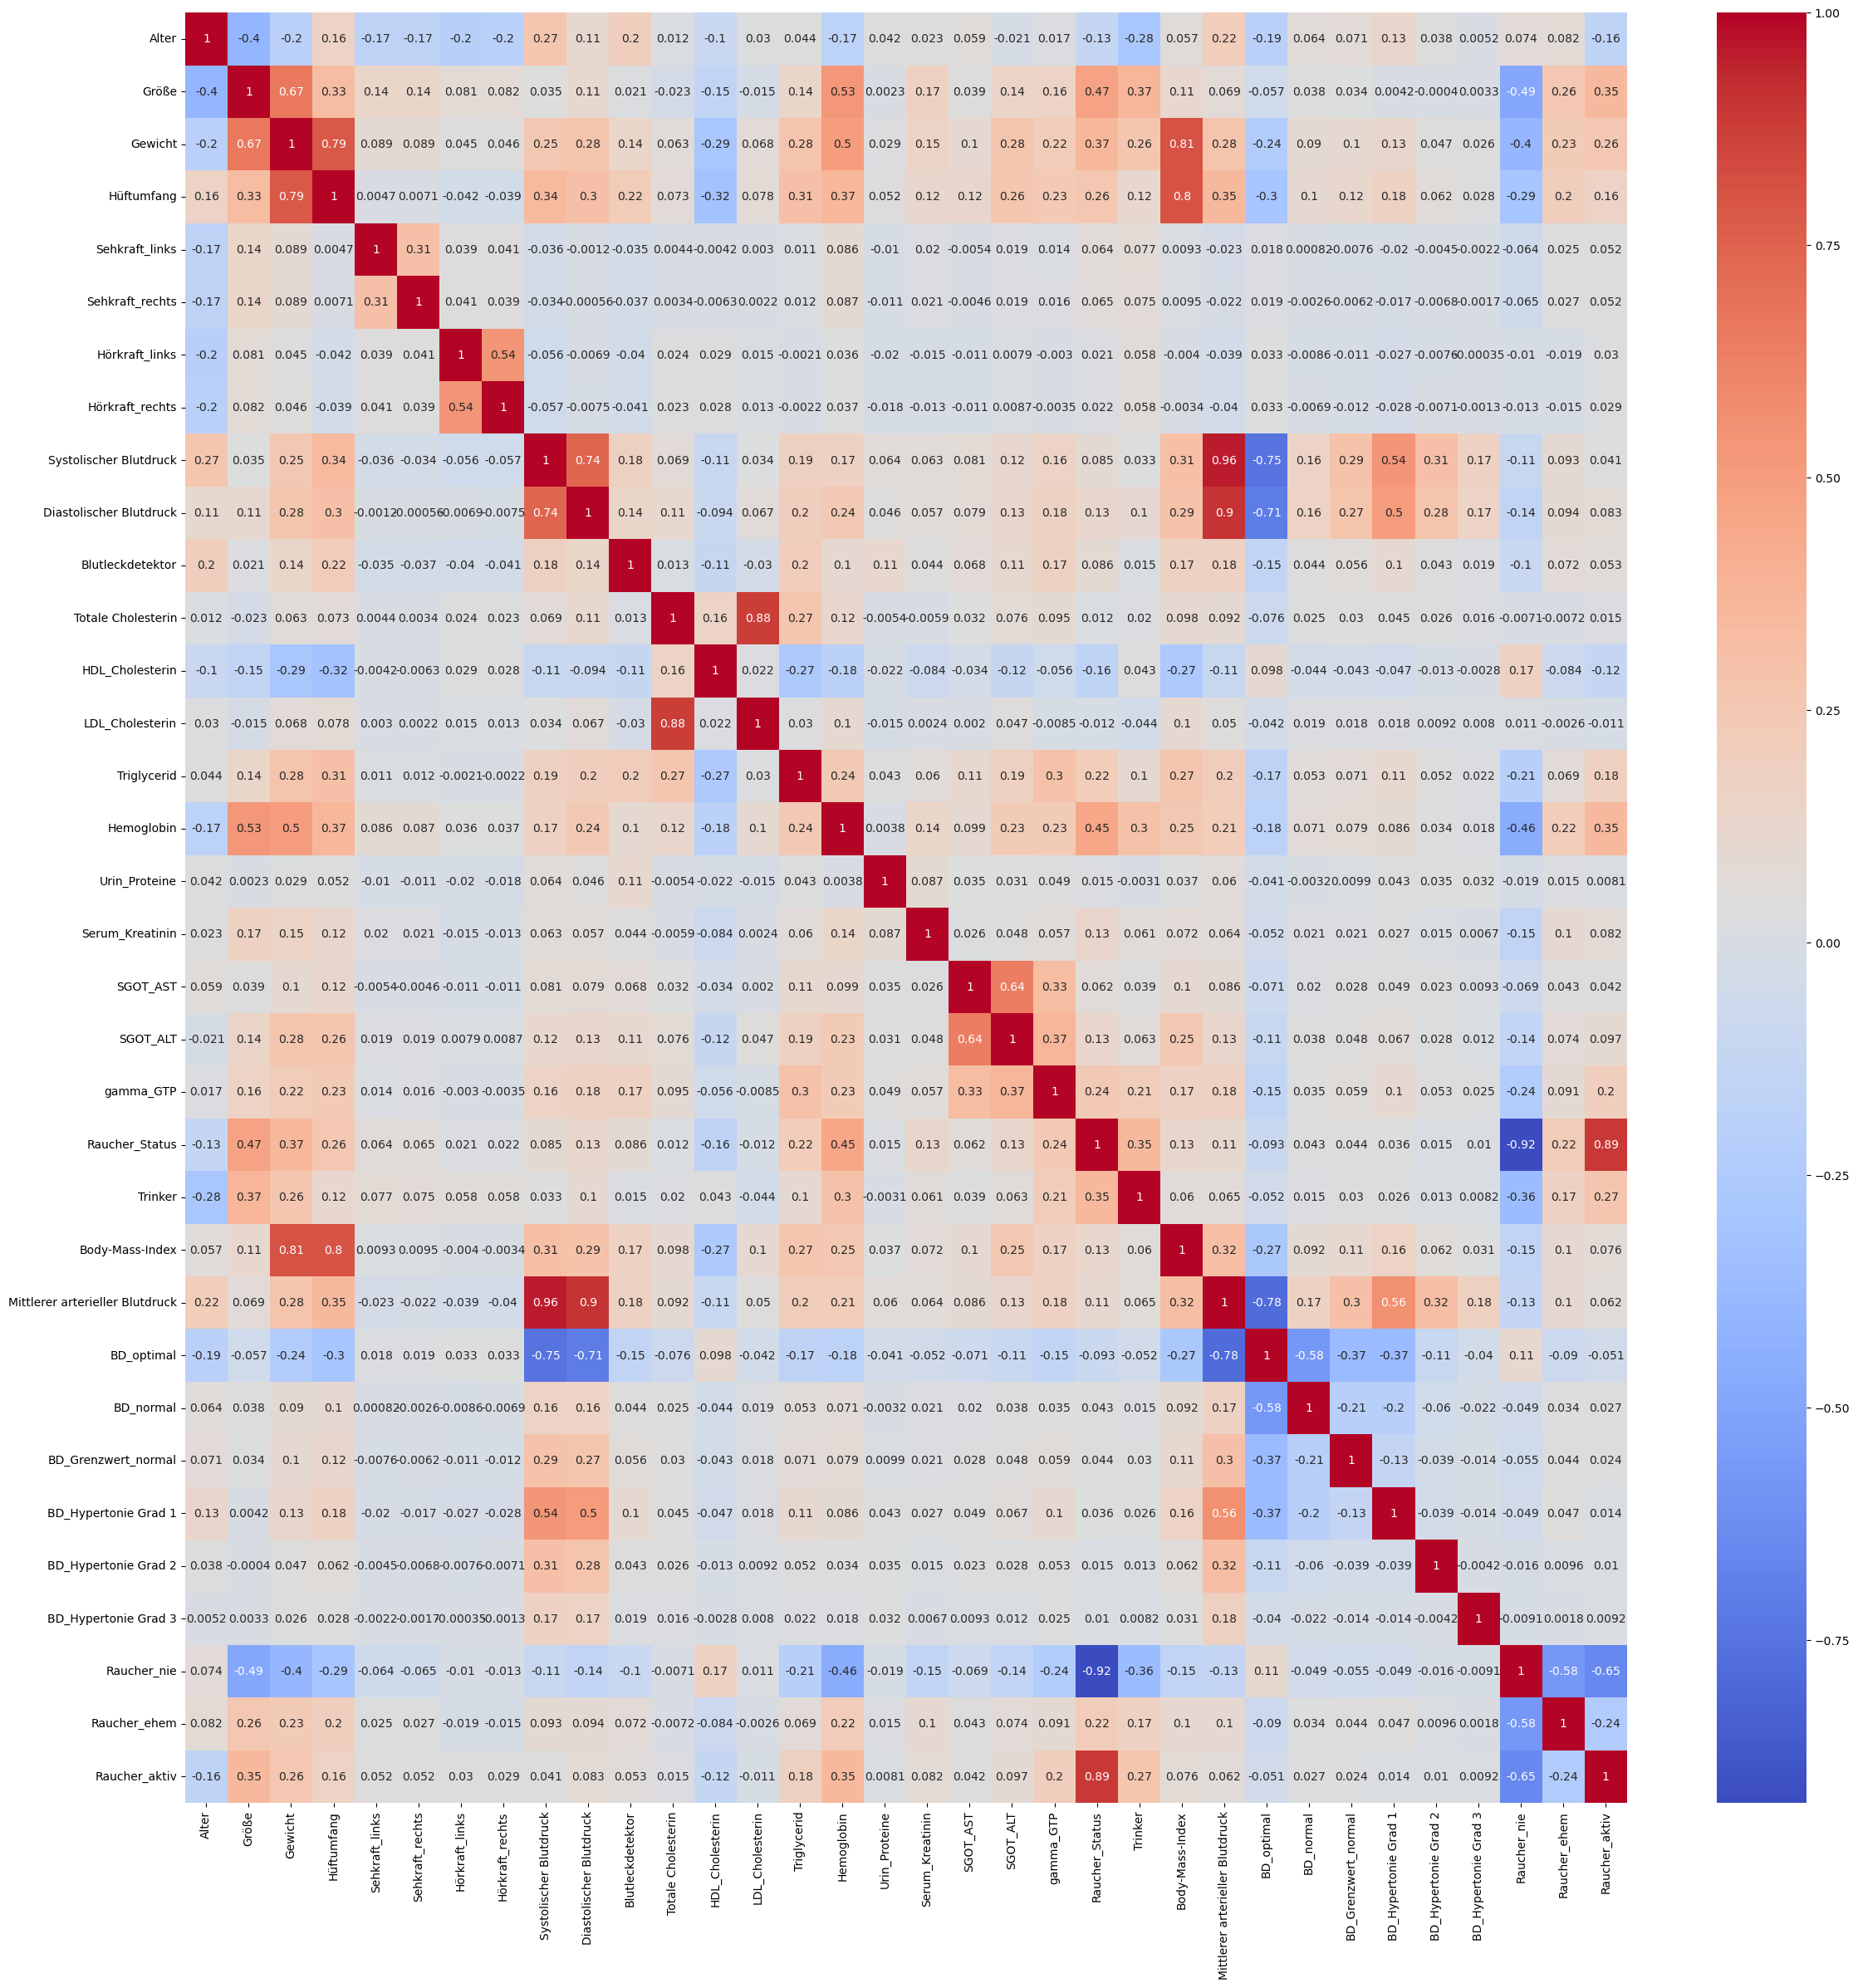

In [37]:

# Untersuchung der Korrelation aller Features:

plt.figure(figsize=(28, 28))
heatmap = sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")

plt.show()

Anmerkungen: 
